In [ ]:
#http://homepages.inf.ed.ac.uk/rbf/HIPR2/freqfilt.htm
#http://paulbourke.net/miscellaneous/imagefilter/
#'http://scipy.github.io/old-wiki/pages/Cookbook/ButterworthBandpass
#http://www.djmannion.net/psych_programming/vision/sf_filt/sf_filt.html
#http://www.acfr.usyd.edu.au/courses/amme4710/Lectures/AMME4710-Chap4-FrequencyFiltering.pdf
#http://www.mee.tcd.ie/~sigmedia/pmwiki/uploads/Teaching.4S1b/handout4_4s1.pdf
#https://cvtuts.wordpress.com/2014/04/27/gabor-filters-a-practical-overview/
#http://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT_2.php
#http://www.cs.tut.fi/~moncef/SGN-3016-DIP/Chap04.pdf
#http://cmp.felk.cvut.cz/~hlavac/TeachPresEn/11ImageProc/13FourierFiltrationEn.pdf

In [ ]:
import lightroot
%matplotlib inline
#pth  ="C:/Users/mrsir/Box Sync/uncut/Images/083117/149/"
pth  ="C:/Users/mrsir/Box Sync/uncut/Images/310717/"
lightroot.SETTINGS["stack_files"] = pth+"Run0140_tp{:0>3}.tif"
lightroot.SETTINGS["maxint_files"] = pth+"Run0140_tp{}_MIP.tif"

In [ ]:
stack = lightroot.io.get_stack(0)
lightroot.io.plotimg(stack)

In [ ]:
sharpened = lightroot.blobs.sharpen(stack)
lightroot.io.plotimg(sharpened)

In [ ]:
stack_sample = stack#.sum(0)
stack_sample /= stack_sample.max()
#stack_sample[stack_sample<0.155] = 0
from scipy.ndimage import maximum_filter,gaussian_filter,label

stack_sample=gaussian_filter(stack_sample,sigma=20)
stack_sample /= stack_sample.max()
#stack_sample[stack_sample<0.3] = 0
#stack_sample=gaussian_filter(stack_sample,sigma=2)
#stack_sample /= stack_sample.max()
lightroot.io.plotimg(stack_sample)
lightroot.io.plotimg(lightroot.blobs.sharpen(stack_sample))


In [ ]:
# partial= ndimage.gaussian_laplace(stack.sum(0),sigma=16)
# partial /= partial.max()
# partial[partial>0] = 0
# lightroot.io.plotimg(partial)

19/02/2018 20:36:58 INFO(0):Stack loaded from C:/Users/mrsir/Box Sync/uncut/Images/310717/Run0140_tp000.tif
19/02/2018 20:36:58 INFO(0):using low band range for 2d data from 95,99, 50 data percentile [0.332, 0.401, 0.172]
19/02/2018 20:36:59 INFO(0):projecting 2d mask to 3d mask...
19/02/2018 20:36:59 INFO(0):using low band range for 3d data from 95,99, 50 data percentile [0.23, 0.299, 0.144]
19/02/2018 20:36:59 INFO(0):using final filter from percentile low band range 0.299
19/02/2018 20:36:59 INFO(0):checking shine @ 121776.00
19/02/2018 20:36:59 WARN(0):bright frame detected. removing bottom
19/02/2018 20:36:59 INFO(0):extracted root region with volume 11080200 with non-zero 1.10%


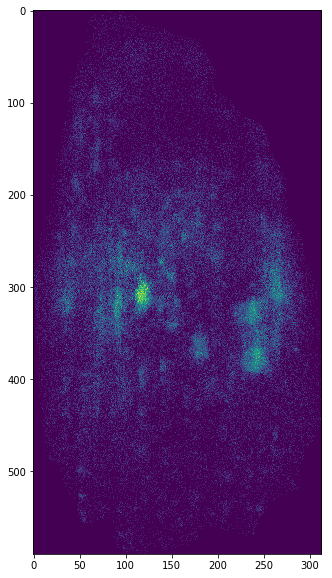

In [16]:
stack = lightroot.io.get_stack(0)
stack = lightroot.blobs.low_pass_2d_proj_root_segmentation(stack)
lightroot.io.plotimg(stack)

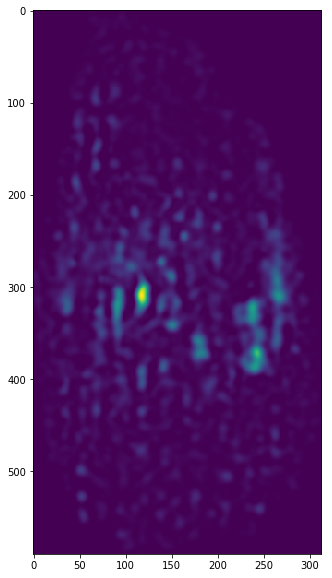

In [20]:
stack = lightroot.blobs.sharpen(stack, iterations=1)
lightroot.io.plotimg(stack)

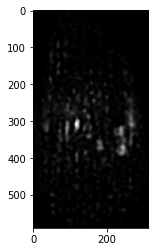

In [23]:
plt.imshow(stack.sum(0), "gray")

19/02/2018 20:43:05 INFO(0):sharpening done. percentage non-zero is 20.64%
19/02/2018 20:43:05 INFO(0):subtacting excessive bottom for noisy data


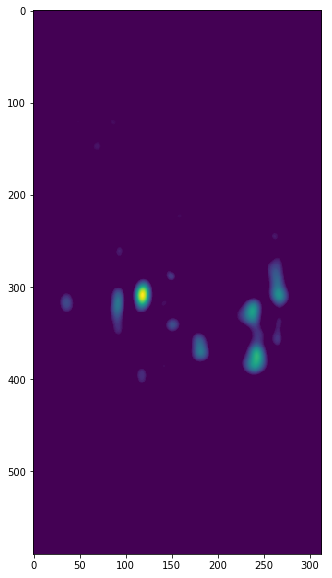

In [24]:
stack = lightroot.blobs.isolate(stack)
ax = lightroot.io.plotimg(stack)

In [25]:
# tile = lightroot.io.tile(stack,0,1,divs=3)
# lightroot.io.plotimg(tile)
tile = stack.sum(0)

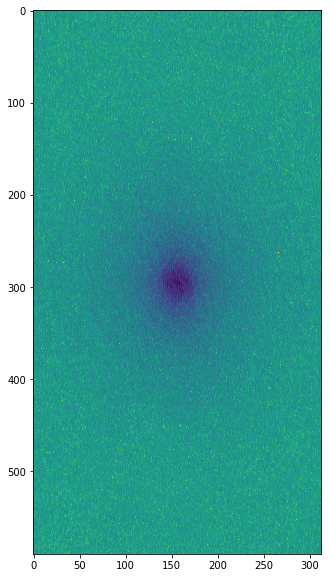

In [6]:
import numpy as np
fourier = np.fft.fft2(tile)
fourier = np.fft.fftshift(fourier)#cd center
fourier=abs(fourier)
fourier = np.log10(fourier)
minval = np.nanmin(fourier[np.isfinite(fourier)])
maxval = np.nanmax(fourier[np.isfinite(fourier)])
orig_range = maxval - minval
normed = (fourier*minval) / orig_range * 255
lightroot.io.plotimg(normed)

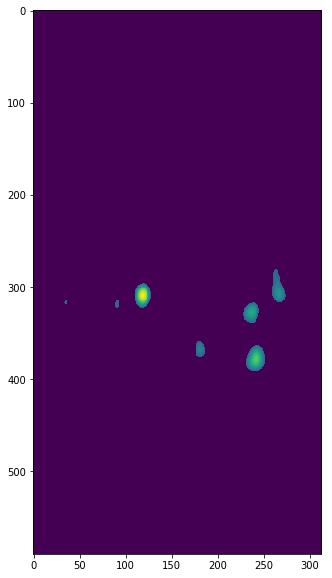

In [14]:
t2 = tile.copy()
t2 /= t2.max()
t2[t2 < 0.3]=0
lightroot.io.plotimg(t2)

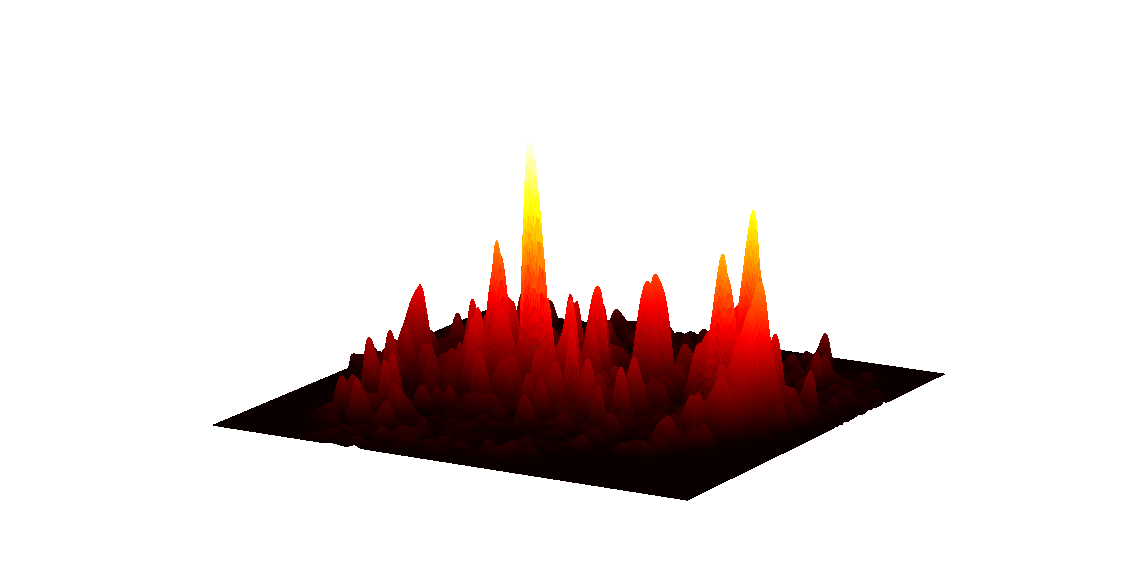

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

image = tile

X = np.arange(0, image.shape[1], 1)
Y = np.arange(0, image.shape[0], 1)
X, Y = np.meshgrid(X, Y)
Z = image
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.set_axis_off()
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)

In [ ]:
img = sharpened.sum(0)
# fft to convert the image to freq domain 
f = np.fft.fft2(img)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
win = 5
# remove the low frequencies by masking with a rectangular window of size 60x60
# High Pass Filter (HPF)
fshift[crow-win:crow+win, ccol-win:ccol+win] = 0
# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)
# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize=(20,10))

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Fianl Result'), plt.xticks([]), plt.yticks([])

#todo find a rose type plot for this


In [ ]:
sharp_back = lightroot.blobs.sharpen(img_back)
sharp_back /= sharp_back.max()
#sharp_back[sharp_back<0.3] = 0
lightroot.io.plotimg(sharp_back)

In [ ]:
def lowpassfilter(size, cutoff, n):
    from scipy.fftpack import fftshift, ifftshift

    """
    Constructs a low-pass Butterworth filter:
        f = 1 / (1 + (w/cutoff)^2n)
    usage:  f = lowpassfilter(sze, cutoff, n)
    where:  size    is a tuple specifying the size of filter to construct
            [rows cols].
        cutoff  is the cutoff frequency of the filter 0 - 0.5
        n   is the order of the filter, the higher n is the sharper
            the transition is. (n must be an integer >= 1). Note
            that n is doubled so that it is always an even integer.
    The frequency origin of the returned filter is at the corners.
    """

    if cutoff < 0. or cutoff > 0.5:  raise Exception('cutoff must be between 0 and 0.5')
    elif n % 1: raise Exception('n must be an integer >= 1')
    if len(size) == 1:  rows = cols = size
    else:   rows, cols = size

    if (cols % 2):  xvals = np.arange(-(cols - 1) / 2.,  ((cols - 1) / 2.) + 1) / float(cols - 1)
    else:  xvals = np.arange(-cols / 2., cols / 2.) / float(cols)

    if (rows % 2):  yvals = np.arange(-(rows - 1) / 2.,  ((rows - 1) / 2.) + 1) / float(rows - 1)
    else:  yvals = np.arange(-rows / 2., rows / 2.) / float(rows)

    x, y = np.meshgrid(xvals, yvals, sparse=True)
    radius = np.sqrt(x * x + y * y)

    return ifftshift(1. / (1. + (radius / cutoff) ** (2. * n)))


In [ ]:
bstack = stack.sum(0)
lp = lowpassfilter(bstack.shape, .45, 15)
bstack = lp*bstack
lightroot.io.plotimg(bstack)